# Analysis of Critics and User Rating

We want to see wether user rating (represented by IMDB rating) and critics rating (represented by the metascore) are significantly different for the films

If so, we want to see how the scores influence the box office return.

This will allow us to determine which score, if any, to target in the creation of our movie



In [121]:
#Import Dependancies
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

In [3]:
#Import the data
df = pd.read_csv('Movie_Data.csv')

df.head()

,IMDb ID,Title,Runtime (mins),Year,Genres,Release Date,IMDb Rating,Metascore,Rating,Box Office
0,tt1872181,The Amazing Spider-Man 2,142,2014,"Action, Adventure, Sci-Fi",4/10/2014,6.6,53,PG-13,183277573
1,tt1323594,Despicable Me,95,2010,"Animation, Comedy, Family, Fantasy",6/20/2010,7.7,72,PG,251476985
2,tt1375670,Grown Ups,102,2010,Comedy,6/24/2010,6.0,30,PG-13,162001186
3,tt0892769,How to Train Your Dragon,98,2010,"Animation, Action, Adventure, Family, Fantasy",3/18/2010,8.1,74,PG,216900000
4,tt1375666,Inception,148,2010,"Action, Adventure, Sci-Fi, Thriller",7/8/2010,8.8,74,PG-13,292568851


# Testing Differences

### First, lets visualize the differences by displaying them as histograms

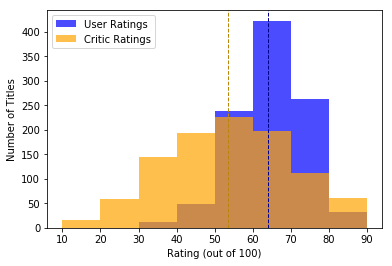

<Figure size 432x288 with 0 Axes>

In [131]:
#Plot the histogram of the IMDb Rating to represent the user ratings
#Values are multiplied by 10 to show them on the same scale as the metascore
plt.hist(df['IMDb Rating'] * 10, bins=[10, 20, 30, 40, 50 , 60, 70, 80, 90], label='User Ratings', alpha=0.7, color='blue')
plt.axvline(df['IMDb Rating'].mean() * 10, color='darkblue', linestyle='dashed', linewidth=1)

#Plot the histogram of the Metacritic Rating to represent the critic rating ratings
plt.hist(df['Metascore'], bins=[10, 20, 30, 40, 50 , 60, 70, 80, 90], label='Critic Ratings', alpha=0.7, color='orange')
plt.axvline(df['Metascore'].mean(), color='darkgoldenrod', linestyle='dashed', linewidth=1)
plt.legend()
plt.xlabel('Rating (out of 100)')
plt.ylabel('Number of Titles')


plt.show()

## Observations

Looking at the histograms, we can see the average User score is higher than the average critic's score.

Most of the user ratings fall between 50 and 70, whereas the critics ratings are much more widely distributed




### Next, let's test to ensure the two are statistically different. We will be using a 2-sample T-test with a confidence level of 95% to make our determination

The hypothesis we are testing is the the two scores are different

The null hypothis is that the two score are the same

In [5]:
p_value = stats.ttest_ind(df['IMDb Rating'] * 10, df['Metascore'], equal_var=False)

print(f"The P value = {p_value[1]}")

The P value = 3.64643515520769e-62


## Observations

Since the P value is less than 5%, we need to reject the null hypothosis that the two scores are the same

### Now that we know the scores are different, let's visualized how the box office returns change given a change in each of the scores.

We can do this by using scatterplots. Again, the need to multipy the IMDb score by 10 to set the axis to be the same.

In [6]:
df['Box Office'].max()

936658640

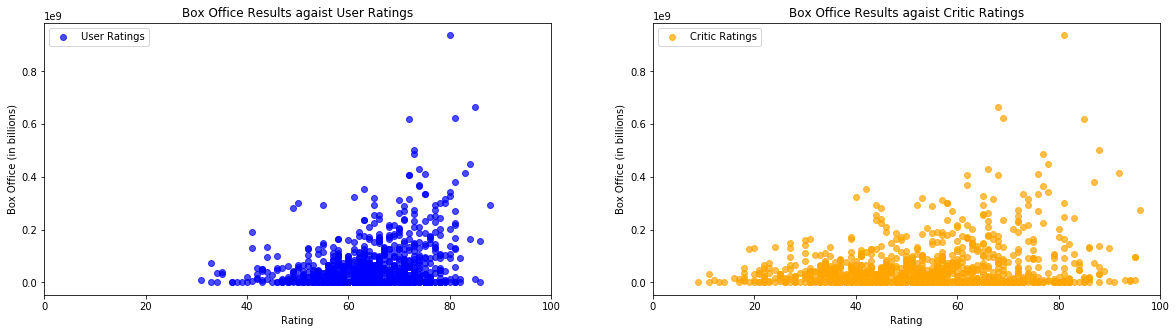

<Figure size 432x288 with 0 Axes>

In [132]:
f = plt.figure(figsize=(20,5))

ax = plt.subplot(1,2,1)
ax.scatter(df['IMDb Rating'] * 10, df['Box Office'], label='User Ratings', alpha=0.7, color='blue')

ax2 = plt.subplot(1,2,2)
ax2.scatter(df['Metascore'],df['Box Office'], label='Critic Ratings', alpha=0.7, color='orange', )

ax.legend()
ax2.set_xbound(0,100)
ax.set_xbound(0,100)
ax2.legend()
ax.set_xlabel('Rating')
ax2.set_xlabel('Rating')
ax.set_ylabel('Box Office (in billions)')
ax2.set_ylabel('Box Office (in billions)')
ax.set_title('Box Office Results agaist User Ratings')
ax2.set_title('Box Office Results agaist Critic Ratings')

plt.show()

## Observations

As expected from the histogram, the critics ratings are have a much wider distribution than the User ratings

There are a large number of movies that, regardless of the rating, have very low box office numbers.

Although the correlation appears weak it does seem like the higher the rating is, there are more high box office movies there are

The variables seem to be highly correlated

### Now we're going to test the observation made in the scatter plots by using a regression analysis for each to see if the trend is satistically significant

In [120]:
regress_user = stats.linregress(df['IMDb Rating'] * 10, df['Box Office'])

regress_user

LinregressResult(slope=2800558.7969714804, intercept=-123764877.13609344, rvalue=0.28739826331757057, pvalue=8.601849051918464e-21, stderr=292959.3963561884)

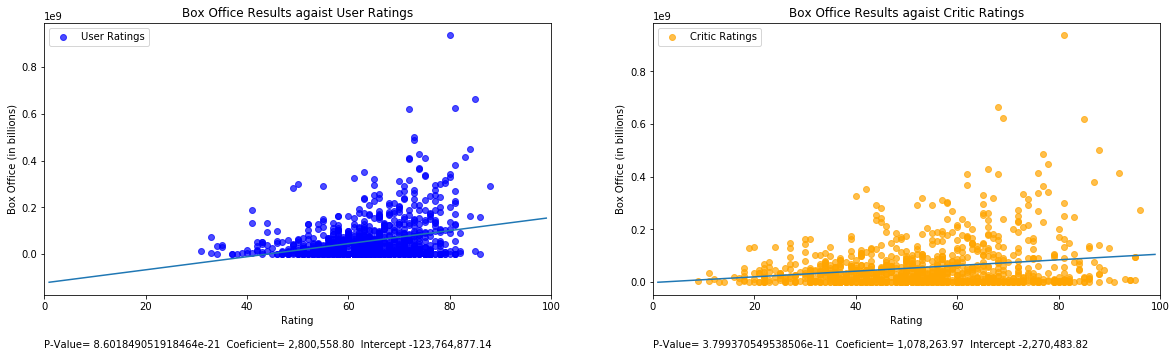

<Figure size 432x288 with 0 Axes>

In [133]:
f = plt.figure(figsize=(20,5))
x = np.arange(1, 100, 1)
regress_user = stats.linregress(df['IMDb Rating'] * 10, df['Box Office'])
regress_critic = stats.linregress(df['Metascore'], df['Box Office'])

ax = plt.subplot(1,2,1)
ax.scatter(df['IMDb Rating'] * 10, df['Box Office'], label='User Ratings', alpha=0.7, color='blue')
ax.plot(x, x * regress_user[0] + regress_user[1])

ax2 = plt.subplot(1,2,2)
ax2.scatter(df['Metascore'],df['Box Office'], label='Critic Ratings', alpha=0.7, color='orange', )
ax2.plot(x, x * regress_critic[0] + regress_critic[1])

ax.legend()
ax2.set_xbound(0,100)
ax.set_xbound(0,100)
ax2.legend()
ax.set_xlabel('Rating')
ax2.set_xlabel('Rating')
ax.set_ylabel('Box Office (in billions)')
ax2.set_ylabel('Box Office (in billions)')
ax.set_title('Box Office Results agaist User Ratings')
ax2.set_title('Box Office Results agaist Critic Ratings')
ax.text(0, -4 * 100000000, 'P-Value= ' + str(regress_user[3]) + '  Coeficient= ' + "{:,.2f}".format(regress_user[0]) + '  Intercept ' + "{:,.2f}".format(regress_user[1]))
ax2.text(0, -2.5 * 100000000, 'P-Value= ' + str(regress_critic[3]) + '  Coeficient= ' + "{:,.2f}".format(regress_critic[0]) + '  Intercept ' + "{:,.2f}".format(regress_critic[1]))

plt.show()

## Observations

Simple linear regression for each of the variables show that, independantly, they are both significant



### Since both are independantly significant and they appear to be correlated, let's set up a multiple linear regression analysis to determine if they are both still significant together

In [130]:
X = df[['IMDb Rating', 'Metascore']]
y = df['Box Office']

X = sm.add_constant(X)
est = sm.OLS(y, X).fit()

est.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Box Office   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     45.70
Date:                Mon, 04 Mar 2019   Prob (F-statistic):           9.92e-20
Time:                        20:44:56   Log-Likelihood:                -20004.
No. Observations:                1017   AIC:                         4.001e+04
Df Residuals:                    1014   BIC:                         4.003e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.263e+08   2.05e+07     -6.146      0.000   -1.67e+08   -8.59e+07
IMDb Rating  2.901e+07   4.34e+06      6.692      0.000    2.05e+07    3.75e+07
Metascore   -7.349e+04   2.34e+05     -0.315      0.753   -5.32e+05    3.85e+05
==============================================================================
Omnibus:                      719.680   Durbin-Watson:                   1.370
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12911.763
Skew:                           3.047   Prob(JB):                         0.00
Kurtosis:                      19.357   Cond. No.                         446.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Observations

After including both variables in the model, we can see that the critic's ratings (Metascore) is no longer significant.

Even though user rating is found to be significant, this modle only has an adjusted R-squared of 0.081, meaning that only 8.3% of the variability is explained by the model.

As such, we should try to maximize the user rating of our film.
